In [ ]:
# !pip install pytorch_lightning

In [11]:
import sys
import os

def is_colab_env():
    return "google.colab" in sys.modules

def mount_google_drive(drive_dir="/content/drive/", repo_dir="MyDrive/repositories/deepfake-detection"):
    # mount google drive
    from google.colab import drive
    drive.mount(drive_dir)

    # change to correct working directory
    import os
    repo_dir = f"{drive_dir}{repo_dir}"
    os.chdir(repo_dir)
    print(os.listdir()) # verify content
    return repo_dir

def resolve_path(levels_deep=3):
    if is_colab_env():
        return mount_google_drive()
    else:
        # Get the directory of the current script
        current_dir = os.path.dirname(os.path.abspath('__file__'))

        # Construct the path to the parent directory
        for i in range(levels_deep):
            current_dir = os.path.dirname(current_dir)

        # Add the parent directory to sys.path
        sys.path.append(current_dir)
        print(sys.path)
        return current_dir

proj_dir = resolve_path(2)

Mounted at /content/drive/
['src', '.git', 'playground', 'setup', 'README.md', 'hf_wdf.sh', 'freqnet_image.ipynb', 'reports', '__pycache__', 'faceforensics_download.py', 'environment.yml', 'run_jupyter.sh', 'config.py', 'dct_mean_real_fake.png', 'analysis', '.gitignore']


In [31]:
# import local config
import config

In [32]:
# from datasets import load_dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
import os
output_dir = config.ANALYSIS_DIR
os.makedirs(f"{output_dir}/metrics/", exist_ok=True)

In [16]:
df = pd.read_csv('reports/overall_metrics.csv')
print(df.head()) # Displays the first 5 rows of the DataFrame

       label  step  test_acc  test_auc   test_f1  test_loss  test_prec  \
0        rgb     0  0.777287  0.863684  0.813442   0.954076   0.886210   
1      phase     0  0.707006  0.757842  0.767845   0.614273   0.786388   
2  magnitude     0  0.700975  0.732852  0.771570   0.685090   0.761551   
3        fft     0  0.670286  0.731152  0.729547   0.706762   0.775817   
4    dwt_rgb     0  0.793278  0.869819  0.832853   0.822371   0.871653   

   test_rec  
0  0.751717  
1  0.750157  
2  0.781857  
3  0.688485  
4  0.797361  


In [22]:
prelim_select = ["rgb", "fft", "dct", "dwt"]
prelim = df[df['label'].isin(prelim_select)]
print(prelim.head()) # Displays the first 5 rows of the DataFrame

  label  step  test_acc  test_auc   test_f1  test_loss  test_prec  test_rec
0   rgb     0  0.777287  0.863684  0.813442   0.954076   0.886210  0.751717
3   fft     0  0.670286  0.731152  0.729547   0.706762   0.775817  0.688485
5   dwt     0  0.768486  0.848952  0.807166   1.005680   0.873553  0.750157
6   dct     0  0.712378  0.751655  0.776542   0.704300   0.779378  0.773726


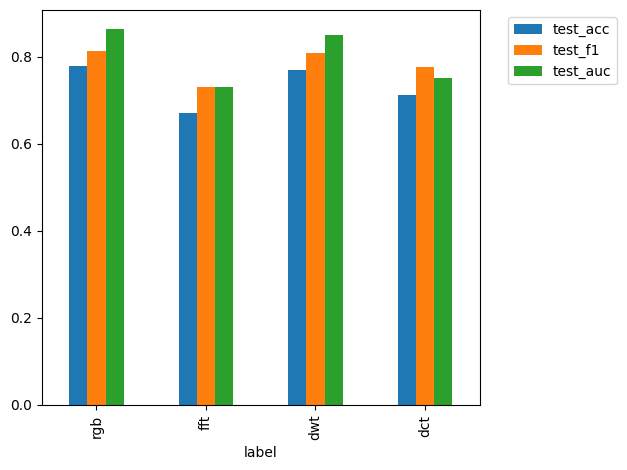

In [34]:
ax = prelim.plot(x='label', y=['test_acc', 'test_f1', 'test_auc'], kind="bar")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Places legend outside to the right
plt.tight_layout() # Adjusts plot parameters for a tight layout
plt.savefig(f'{output_dir}/metrics/test_metric_main.png', dpi=300, bbox_inches='tight')
plt.show()

       label  step  test_acc  test_auc   test_f1  test_loss  test_prec  \
1      phase     0  0.707006  0.757842  0.767845   0.614273   0.786388   
2  magnitude     0  0.700975  0.732852  0.771570   0.685090   0.761551   
3        fft     0  0.670286  0.731152  0.729547   0.706762   0.775817   

   test_rec  
1  0.750157  
2  0.781857  
3  0.688485  


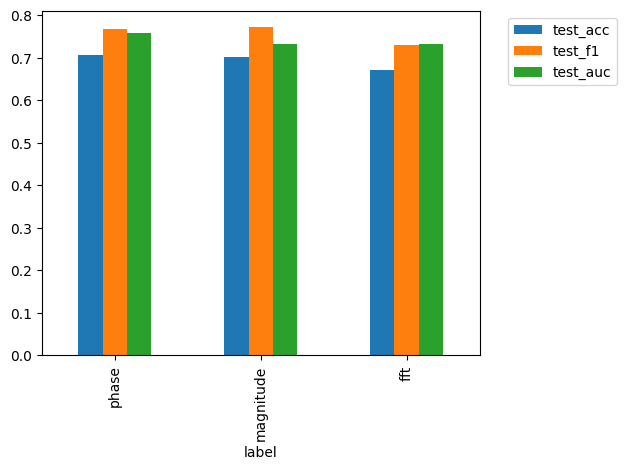

In [35]:
fft_select = ["fft", "magnitude", "phase"]
fft_results = df[df['label'].isin(fft_select)]
print(fft_results.head()) # Displays the first 5 rows of the DataFrame

ax = fft_results.plot(x='label', y=['test_acc', 'test_f1', 'test_auc'], kind="bar")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Places legend outside to the right
plt.tight_layout() # Adjusts plot parameters for a tight layout
plt.savefig(f'{output_dir}/metrics/test_metric_fft.png', dpi=300, bbox_inches='tight')
plt.show()

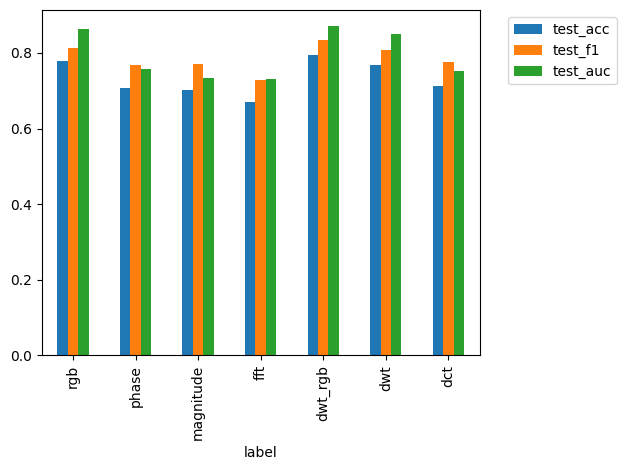

In [36]:
ax = df.plot(x='label', y=['test_acc', 'test_f1', 'test_auc'], kind="bar")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Places legend outside to the right
plt.tight_layout() # Adjusts plot parameters for a tight layout
plt.savefig(f'{output_dir}/metrics/test_metric_overall.png', dpi=300, bbox_inches='tight')
plt.show()